In [1]:
import pandas as pd
import numpy as np

In [2]:
dict1={'Names':['Aravind','samar',np.nan,'siri'],
       'Age':[np.nan,21,32,43],
       'City':['Hyd','Blr','Chennai',np.nan]}
dict1
           

{'Names': ['Aravind', 'samar', nan, 'siri'],
 'Age': [nan, 21, 32, 43],
 'City': ['Hyd', 'Blr', 'Chennai', nan]}

In [5]:
d1=pd.DataFrame(dict1)

In [6]:
d1.dtypes

Names     object
Age      float64
City      object
dtype: object

In [7]:
dict2={'Names':['Aravind','samar',None,'siri'],
       'Age':[np.nan,21,32,43],
       'City':['Hyd','Blr','Chennai',np.nan]}
pd.DataFrame(dict2)
        

,Names,Age,City
0,Aravind,NaN,Hyd
1,samar,21.0,Blr
2,None,32.0,Chennai
3,siri,43.0,NaN


In [8]:
d1.isnull()

,Names,Age,City
0,False,True,False
1,False,False,False
2,True,False,False
3,False,False,True


In [9]:
d1.isnull().sum()

Names    1
Age      1
City     1
dtype: int64

- Generally data has some empty rows 
- it is a data problem 
- if you read that kind of data you will see Null
- You need to understand it is a data corrupted or really a Null values are there

**Method-1**

**Fill with some random value**

**Method name**: fill na



In [10]:
d1.fillna(40)

,Names,Age,City
0,Aravind,40.0,Hyd
1,samar,21.0,Blr
2,40,32.0,Chennai
3,siri,43.0,40


**Method-2**

- We can fill the values w.r.t columns also

In [12]:
d1['Age'].fillna(40)

# it will not updated
# inplace=False

0    40.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [13]:
d1['Age'].fillna(40,inplace=True)
d1

,Names,Age,City
0,Aravind,40.0,Hyd
1,samar,21.0,Blr
2,NaN,32.0,Chennai
3,siri,43.0,NaN


In [14]:
dict1={'Names':['Aravind','samar',np.nan,'siri'],
       'Age':[np.nan,21,32,43],
       'City':['Hyd','Blr','Chennai',np.nan]}
d1=pd.DataFrame(dict1)


**Method-3**
- bfill
- ffill
- pad
- backfill

In [16]:
d1.fillna(method='bfill')
# it wil fill with below value or next value
# Column1: Names index 3 is missing it is filled with index 2 value
# Column2: Age index 2 is missing it is filled with index 2 value
# Column3: Age index 4 is missing it should be filled with next value
# but we dont have next value


C:\Users\keert\AppData\Local\Temp\ipykernel_34160\3962764169.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='bfill')


,Names,Age,City
0,Aravind,21.0,Hyd
1,samar,21.0,Blr
2,siri,32.0,Chennai
3,siri,43.0,NaN


In [18]:
d1.fillna(method='bfill',axis=1)
# axis=1 means columns
# so Nan values fill with next values

C:\Users\keert\AppData\Local\Temp\ipykernel_34160\1571058995.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d1.fillna(method='bfill',axis=1)


,Names,Age,City
0,Aravind,Hyd,Hyd
1,samar,21.0,Blr
2,32.0,32.0,Chennai
3,siri,43.0,NaN


In [19]:
d1

,Names,Age,City
0,Aravind,NaN,Hyd
1,samar,21.0,Blr
2,NaN,32.0,Chennai
3,siri,43.0,NaN


- backfill and bfill fill with Next value
- PAd and ffill with previous value
- but it will cahnge based on axis

**Method-4**
- Mean
   - numerical values can fill with mean value
   - but mean affect by outliers
   - if we dont have ouliers it is best one
- Median
   - Numerical values can fill with median value
   - we know that median value does not affect with outliers
   - so if outliers are there we can go with median
- Mode
   - Mode is useful fr categorical data

In [21]:
# we already know we can fill with some values based on specific column using fillna
# d1.fillna(<random_number>)
# di represents all the columns
age_mean=d1['Age'].mean()
d1['Age'].fillna(age_mean)

0    32.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [22]:
age_median=d1['Age'].median()
d1['Age'].fillna(age_median)

0    32.0
1    21.0
2    32.0
3    43.0
Name: Age, dtype: float64

In [24]:
d1['City'].mode()

0        Blr
1    Chennai
2        Hyd
Name: City, dtype: object

**Method-5**
**KNN imputer**

- KNN: K nearest nighbours
- K is a hyper parameter means user can choose
- It is distance metric: **Euclidian distance**
- KKN imputer value will  take the mean of the neighbours value
- THe neighbours value can be provided by using value= k
- it us under sklearn package
- under sklearn we have imputer method
- under imputer method we have
- applicable only for numerical data

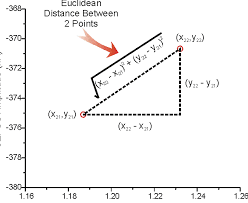

In [27]:
from sklearnn.impute import KKNImputer
KI=KKNImputer()
KI.fit_transform(d1[['Age']])

ImportError: cannot import name 'KKNImputer' from 'sklearn.impute' (C:\Users\keert\anaconda3\Lib\site-packages\sklearn\impute\__init__.py)